In [1]:
import emcee
import initialization_data as init
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = init.get_distance()
time = init.get_time()
gamma = init.get_gamma()

mean = init.get_central_mean()
sigma = init.get_narrow_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)

theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

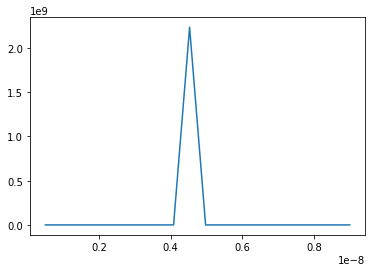

In [3]:
plt.plot(d, f)

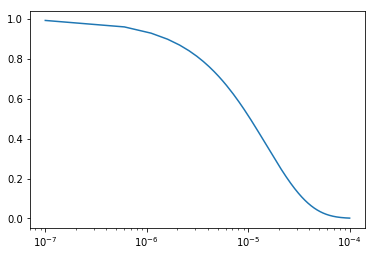

In [4]:
plt.semilogx(time, sim_data)

In [5]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [6]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [7]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [8]:
result = dls.infer(sampler, start_pos, nsteps)

In [9]:
result.acceptance_fraction

array([0.358, 0.363, 0.358, 0.395, 0.401, 0.343, 0.362, 0.35 , 0.38 ,
       0.362, 0.362, 0.359, 0.393, 0.36 , 0.369, 0.376, 0.365, 0.375,
       0.359, 0.361, 0.354, 0.352, 0.36 , 0.365, 0.359, 0.356, 0.363,
       0.359, 0.387, 0.388, 0.341, 0.355, 0.364, 0.372, 0.37 , 0.375,
       0.363, 0.374, 0.355, 0.348, 0.336, 0.369, 0.361, 0.363, 0.34 ,
       0.342, 0.406, 0.345, 0.34 , 0.367, 0.334, 0.349, 0.354, 0.37 ,
       0.347, 0.354, 0.377, 0.37 , 0.359, 0.334, 0.381, 0.398, 0.363,
       0.365, 0.369, 0.361, 0.354, 0.358, 0.373, 0.339, 0.37 , 0.385,
       0.362, 0.399, 0.391, 0.374, 0.365, 0.391, 0.375, 0.373, 0.38 ,
       0.364, 0.366, 0.384, 0.354, 0.379, 0.352, 0.38 , 0.361, 0.371,
       0.38 , 0.361, 0.329, 0.349, 0.346, 0.329, 0.386, 0.364, 0.341,
       0.352])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


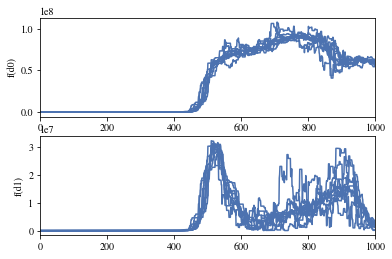

In [10]:
dls.view_burnin_plot(result, 0, 1)

In [11]:
chained_sampler = dls.chain(result, 850, ndim)

In [12]:
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,6.274151e+07,1.132545e+07,3.084732e+08,1.263984e+09,2.266942e+08,3.886989e+08,4.058581e+08,8.076498e+06,2.460030e+08,5.041774e+08,2.870715e+08,3.516946e+08,2.105519e+08,6.132154e+08,9.756370e+08,8.227959e+08,1.281563e+09,9.914463e+08,1.347361e+09,2.496931e+09


In [13]:
infer_f = np.zeros(20)
infer_f[0] = 2.310535e+08
infer_f[1] = 1.759836e+06
infer_f[2] = 4.196283e+07
infer_f[3] = 4.351456e+07
infer_f[4] = 749611.054973
infer_f[5] = 1.087448e+08
infer_f[6] = 2.640837e+07
infer_f[7] = 531078.927071
infer_f[8] = 4.893541e+06
infer_f[9] = 2.289540e+09
infer_f[10] = 1.485951e+08
infer_f[11] = 2.892689e+08
infer_f[12] = 6.596003e+06
infer_f[13] = 1.261200e+08
infer_f[14] = 1.256233e+06
infer_f[15] = 6.527858e+07
infer_f[16] = 4.916944e+07
infer_f[17] = 1.544432e+08
infer_f[18] = 6.145509e+06
infer_f[19] = 9.811806e+07

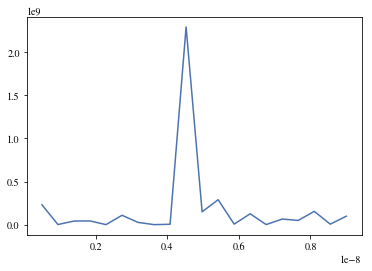

In [14]:
plt.plot(d, infer_f)

In [15]:
inferbeta_df = dls.get_beta(chained_sampler, ndim)
betaq = inferbeta_df.quantile([0.5], axis=0)

In [16]:
betaq

,beta
0.5,1.640258


In [21]:
beta_1 = betaq.values

In [22]:
beta_1 = beta_1[0]

In [23]:
beta_1

array([1.6402576])

In [33]:
theta_infer = np.append(infer_f, beta_1)

In [34]:
infer_g2 = dls.g2(theta_infer, d, m, gamma, time)

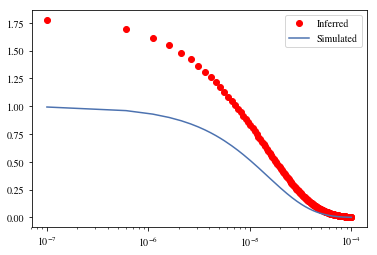

In [35]:
plt.semilogx(time, infer_g2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

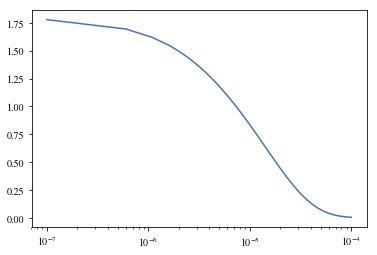

In [36]:
plt.semilogx(time, infer_g2)

In [37]:
sigma


6.666666666666667e-11